# COTA Data Exploration

Initial exploration of GTFS static and realtime data


In [ ]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.loaders.gtfs import GTFSLoader
from src.analysis.metrics import RouteMetrics

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline


## Load Data


In [ ]:
loader = GTFSLoader()
loader.load_all()

print("Data Summary:")
for key, count in loader.summary().items():
    print(f"  {key:15} {count:>8,}")


Data Summary:
  routes                42
  stops              2,985
  trips              5,475
  stop_times       364,147
  shapes            99,775


## Routes Overview


In [ ]:
routes = loader.routes
print(f"Total routes: {len(routes)}")
print(f"\nRoute types:")
print(routes['route_type'].value_counts())

routes[['route_short_name', 'route_long_name', 'route_type']].head(10)


Total routes: 42

Route types:
route_type
3    42
Name: count, dtype: int64


,route_short_name,route_long_name,route_type
0,1,KENNY/LIVINGSTON,3
1,2,E MAIN/N HIGH,3
2,3,NORTHWEST/HARRISBURG,3
3,4,INDIANOLA/LOCKBOURNE,3
4,5,W 5TH AVE/REFUGEE,3
5,6,SULLIVANT,3
6,7,MT VERNON,3
7,8,KARL/S HIGH/PARSONS,3
8,9,W MOUND/BRENTNELL,3
9,10,E BROAD/W BROAD,3


## Stops Analysis


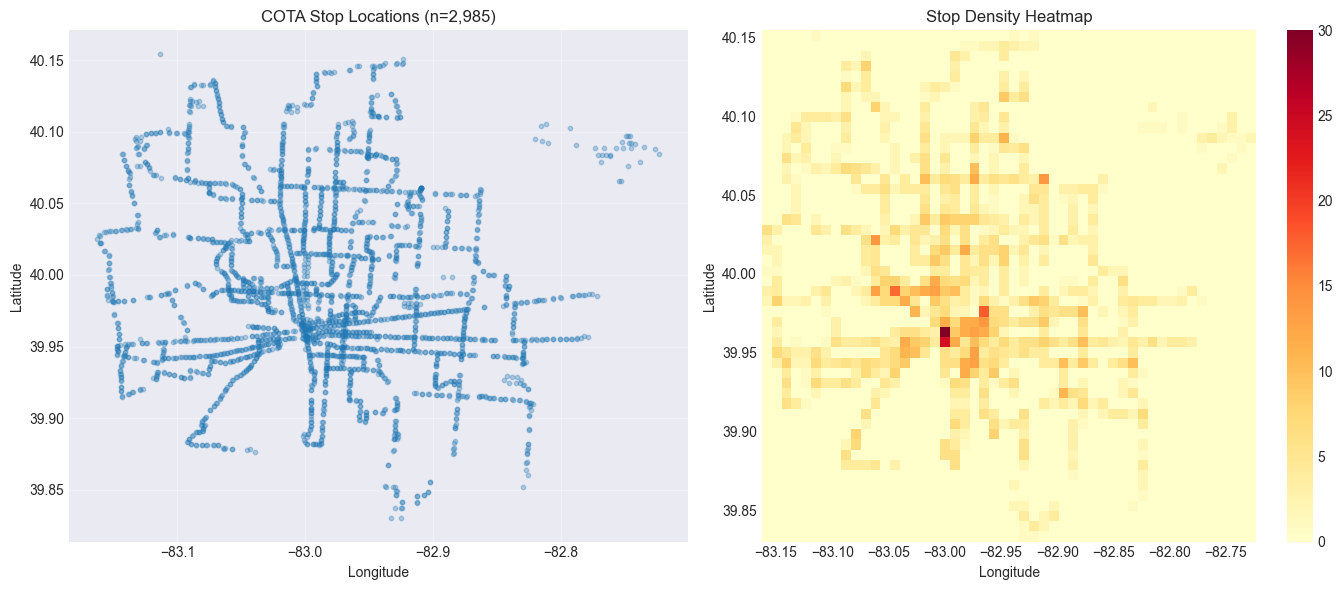

In [ ]:
stops = loader.stops

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Stop locations
axes[0].scatter(stops['stop_lon'], stops['stop_lat'], alpha=0.3, s=10)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title(f'COTA Stop Locations (n={len(stops):,})')
axes[0].grid(True, alpha=0.3)

# Stop density heatmap
h = axes[1].hist2d(stops['stop_lon'], stops['stop_lat'], bins=50, cmap='YlOrRd')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].set_title('Stop Density Heatmap')
plt.colorbar(h[3], ax=axes[1])

plt.tight_layout()
plt.show()


## Trip Patterns


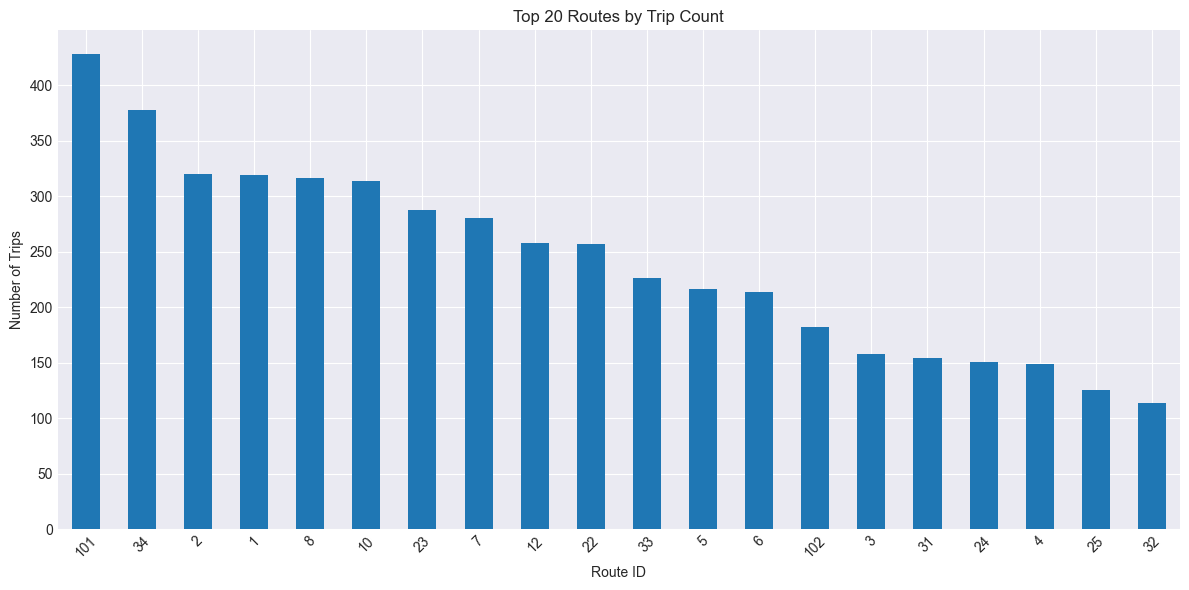


Trips per route stats:
count     41.000000
mean     133.536585
std      127.013798
min        2.000000
25%        6.000000
50%      111.000000
75%      226.000000
max      428.000000
dtype: float64


In [ ]:
trips = loader.trips

trips_per_route = trips.groupby('route_id').size().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
trips_per_route.head(20).plot(kind='bar')
plt.xlabel('Route ID')
plt.ylabel('Number of Trips')
plt.title('Top 20 Routes by Trip Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nTrips per route stats:")
print(trips_per_route.describe())


## Stop Times Analysis


/var/folders/d1/pgnj29zs187c71kqjpz33kkh0000gn/T/ipykernel_78864/1185317589.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_times['hour'] = stop_times['departure_time'].apply(parse_hour)


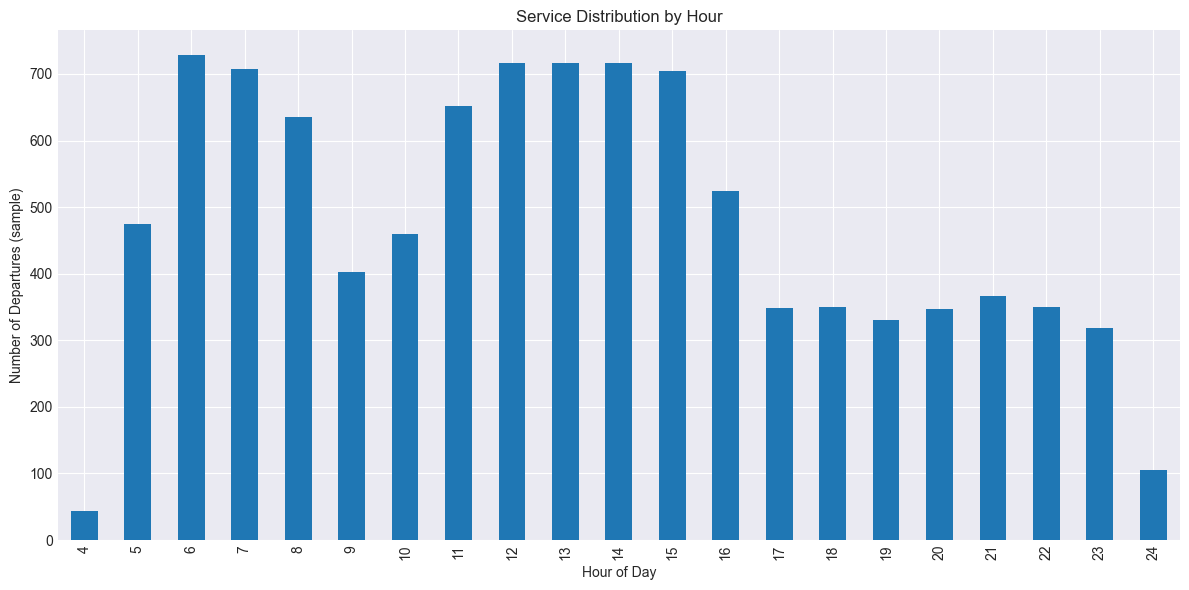

In [ ]:
stop_times = loader.stop_times.head(10000).copy()  # Sample for speed

# Parse departure times to hour of day
def parse_hour(time_str):
    try:
        return int(str(time_str).split(':')[0])
    except:
        return None

stop_times['hour'] = stop_times['departure_time'].apply(parse_hour)

plt.figure(figsize=(12, 6))
stop_times['hour'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Departures (sample)')
plt.title('Service Distribution by Hour')
plt.tight_layout()
plt.show()


## Route Metrics


In [7]:
metrics = RouteMetrics(loader)

# Calculate metrics for a sample route
sample_route = routes.iloc[0]['route_id']
print(f"Sample route: {sample_route}")
print(f"Directness: {metrics.route_directness(sample_route):.2f}")
print(f"Stops per km: {metrics.stops_per_km(sample_route):.2f}")
print(f"Trips per day: {metrics.trips_per_day(sample_route)}")
print(f"Service span: {metrics.service_span_hours(sample_route):.1f} hours")


Sample route: 1
Directness: 1.29
Stops per km: 1.80
Trips per day: 319
Service span: 20.1 hours


## Next Steps

1. Calculate metrics for all routes
2. Load and analyze realtime feeds
3. Identify efficiency outliers
4. Build baseline demand model
